In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import torch
import os
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [93]:
# !conda install matplotlib
# !conda install numpy
# !conda install pandas
# !conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
# !conda install pillow  # For PIL, which is part of Pillow, a fork of PIL
# !pip install tensorflow
# !pip install mediapipe --user
# !conda install conda-forge::tensorflow  





In [94]:
import tensorflow as tf

# List all physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    print(f"Number of GPUs available: {len(gpus)}")
    for gpu in gpus:
        print("Name:", gpu.name, "Type:", gpu.device_type)
else:
    print("CUDA is not available. TensorFlow will run on CPU.")


CUDA is not available. TensorFlow will run on CPU.


In [95]:
train = pd.read_csv('./sign_mnist_train.csv')
test = pd.read_csv('./sign_mnist_test.csv')
combined_dataset = pd.concat([train, test], ignore_index=True)

In [96]:
print(combined_dataset.head())
combined_dataset.shape

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

(34627, 785)

In [97]:
labels = combined_dataset['label'].values
unique_val = np.array(labels)
print("Classes: ",np.unique(unique_val))

Classes:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [98]:
Classes = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    10: "K",
    11: "L",
    12: "M",
    13: "N",
    14: "O",
    15: "P",
    16: "Q",
    17: "R",
    18: "S",
    19: "T",
    20: "U",
    21: "V",
    22: "W",
    23: "X",
    24: "Y",
}


In [99]:

for i in np.unique(unique_val):
    os.makedirs("image_dataset/"+Classes[i], exist_ok=True)

In [100]:
combined_dataset.drop('label', axis = 1, inplace = True)
images = combined_dataset.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [101]:

# plt.imshow(images[26].reshape(28,28).astype(np.uint8))
# image = Image.fromarray(images[26].reshape(28,28).astype(np.uint8),'L')
# image.save('output_image1.png')

for i,img in enumerate(images):
    image = Image.fromarray(img.reshape(28,28).astype(np.uint8),'L')
    image.save('image_dataset/'+Classes[labels[i]]+'/'+str(i)+'.png')
    print(str(i),"/34627")

0 /34627
1 /34627
2 /34627
3 /34627
4 /34627
5 /34627
6 /34627
7 /34627
8 /34627
9 /34627
10 /34627
11 /34627
12 /34627
13 /34627
14 /34627
15 /34627
16 /34627
17 /34627
18 /34627
19 /34627
20 /34627
21 /34627
22 /34627
23 /34627
24 /34627
25 /34627
26 /34627
27 /34627
28 /34627
29 /34627
30 /34627
31 /34627
32 /34627
33 /34627
34 /34627
35 /34627
36 /34627
37 /34627
38 /34627
39 /34627
40 /34627
41 /34627
42 /34627
43 /34627
44 /34627
45 /34627
46 /34627
47 /34627
48 /34627
49 /34627
50 /34627
51 /34627
52 /34627
53 /34627
54 /34627
55 /34627
56 /34627
57 /34627
58 /34627
59 /34627
60 /34627
61 /34627
62 /34627
63 /34627
64 /34627
65 /34627
66 /34627
67 /34627
68 /34627
69 /34627
70 /34627
71 /34627
72 /34627
73 /34627
74 /34627
75 /34627
76 /34627
77 /34627
78 /34627
79 /34627
80 /34627
81 /34627
82 /34627
83 /34627
84 /34627
85 /34627
86 /34627
87 /34627
88 /34627
89 /34627
90 /34627
91 /34627
92 /34627
93 /34627
94 /34627
95 /34627
96 /34627
97 /34627
98 /34627
99 /34627
100 /34627

KeyboardInterrupt: 

In [ ]:
dataset_path=os.getcwd()+"/image_dataset"
print(dataset_path)

img_height,img_width=32,32
batch_size=32

c:\Users\Ryuk\Desktop\ML2_project\Sign_Language_Interpreter_CNN/image_dataset


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=13)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=13)

## out of total data, 70% is for train, 10% for validation and 20% for test


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34627 files belonging to 24 classes.
Using 27702 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34627 files belonging to 24 classes.
Using 6925 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


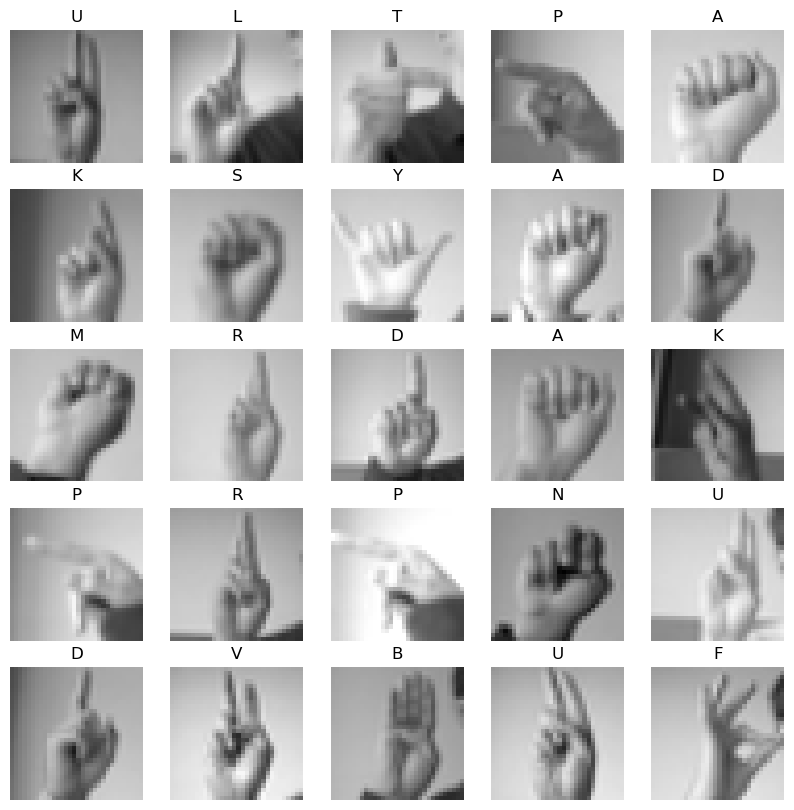

In [ ]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:

resnet_model = Sequential()
pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=24,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(24, activation='softmax'))

In [ ]:
resnet_model.build((None, img_height, img_width, 3))
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,539,594 (59.28 MB)

 Trainable params: 274,968 (1.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 549,938 (2.10 MB)

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=5
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 100s 113ms/step - accuracy: 0.9537 - loss: 0.2331 - val_accuracy: 0.9821 - val_loss: 0.0925
Epoch 2/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 90s 103ms/step - accuracy: 0.9844 - loss: 0.0734 - val_accuracy: 0.9707 - val_loss: 0.1707
Epoch 3/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 89s 102ms/step - accuracy: 0.9861 - loss: 0.0670 - val_accuracy: 0.9847 - val_loss: 0.0885
Epoch 4/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 87s 101ms/step - accuracy: 0.9911 - loss: 0.0547 - val_accuracy: 0.9734 - val_loss: 0.1584
Epoch 5/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 89s 103ms/step - accuracy: 0.9887 - loss: 0.0623 - val_accuracy: 0.9974 - val_loss: 0.0082


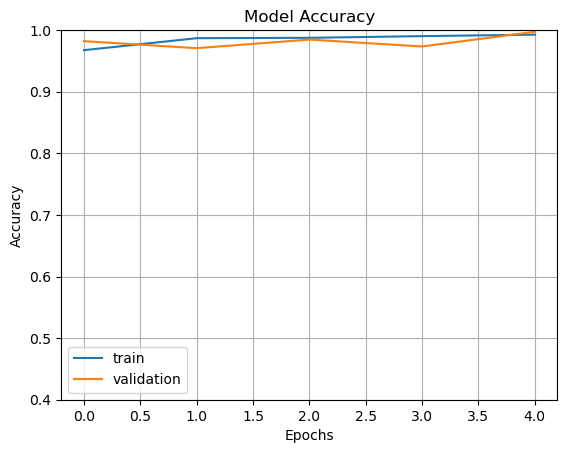

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

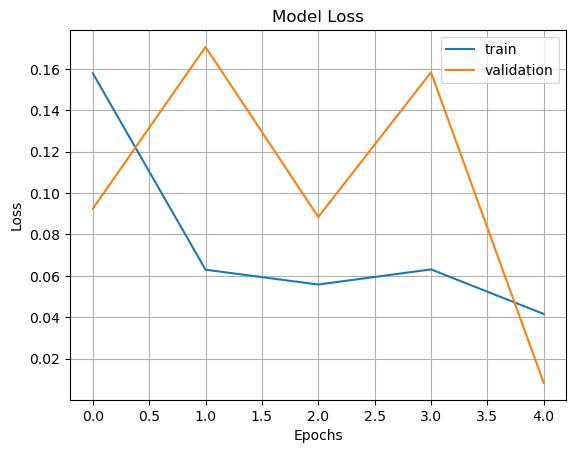

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

MAKE PREDICTIONS

In [ ]:
from pathlib import Path
sign = list(Path(dataset_path).glob('V/*'))
PIL.Image.open(str(sign[4]))

(1, 32, 32, 3)


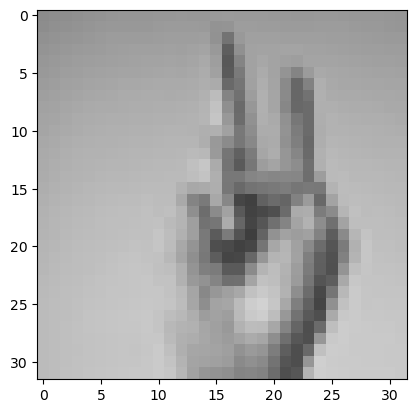

In [ ]:
import cv2
image=cv2.imread(str(sign[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
# print(image)
plt.imshow(image[0])

In [ ]:
print(image.shape)
print(type(image))
l=[]
l.append(image[0])
l=np.array(l)
print(l.shape)

(1, 32, 32, 3)
<class 'numpy.ndarray'>
(1, 32, 32, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1.0815549e-22 2.2120839e-20 4.3136252e-26 2.6521160e-13 7.2514291e-20
  1.6802228e-19 7.2071563e-23 1.4757547e-19 9.4533311e-17 1.0911842e-10
  1.0622246e-19 4.9010873e-25 1.5757139e-14 2.7086550e-30 2.8049362e-20
  2.9427894e-36 1.0461726e-09 4.1111910e-20 1.8014316e-21 2.3166480e-07
  9.9999976e-01 1.7284060e-14 2.7539339e-16 6.4901225e-22]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is V


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# model_dict = pickle.load(open('./model.p', 'rb'))
# model = model_dict['model']

cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

while True:

    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10
        print(np.asarray(data_aux).shape)
        print(np.asarray(data_aux))
        # prediction = resnet_model.predict([np.asarray(data_aux)])

        # predicted_character = class_names[np.argmax(prediction)]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
        cv2.putText(frame, "V", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                    cv2.LINE_AA)

    cv2.imshow('frame', frame)
    cv2.waitKey(1)


cap.release()
cv2.destroyAllWindows()

(42,)
[0.2076734  0.45572394 0.27332845 0.41247803 0.32648531 0.34625828
 0.37901762 0.29190373 0.42833593 0.24473333 0.23746613 0.2402119
 0.23842406 0.12591934 0.23035783 0.05797106 0.21865866 0.
 0.17713454 0.25199133 0.15675783 0.14017785 0.13731468 0.07383174
 0.11592528 0.02549297 0.1297541  0.29517931 0.09113535 0.21060139
 0.06365326 0.16043186 0.04037279 0.11955941 0.09642309 0.35746408
 0.05102587 0.32475942 0.02225585 0.30373436 0.         0.28782254]
(42,)
[0.2413913  0.50541812 0.30617428 0.46176028 0.35562891 0.39888346
 0.40184879 0.33921915 0.44294369 0.28337938 0.25516644 0.27275944
 0.25464219 0.154872   0.24813291 0.07812768 0.23530516 0.00983989
 0.19330925 0.27536774 0.1716913  0.14652091 0.1508984  0.06480843
 0.12452558 0.         0.14450118 0.30840325 0.10679051 0.21095395
 0.08061695 0.14530557 0.05544722 0.09203947 0.10705373 0.36311102
 0.05859759 0.30235094 0.02695973 0.25779754 0.         0.21819901]
(42,)
[0.20375469 0.5771414  0.28206962 0.51395744 0.3441

KeyboardInterrupt: 

480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
P
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
E
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
E
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
E
480 640
(32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

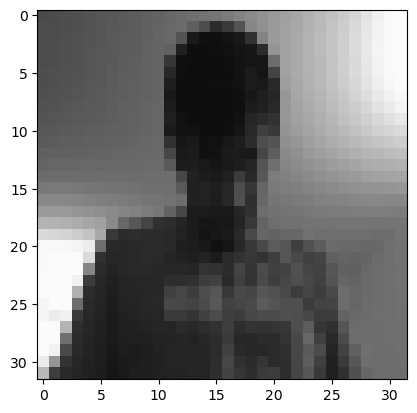

In [110]:
import cv2
import mediapipe as mp
import numpy as np

# model_dict = pickle.load(open('./model.p', 'rb'))
# model = model_dict['model']

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 640)
while True:

    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()
    H, W, _ = frame.shape
    frame_rgb = cv2.resize(frame, (32, 32), interpolation=cv2.INTER_AREA)
    frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)
    frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_GRAY2RGB)
    print(H,W)
    print(frame_rgb.shape)
    # print(frame_rgb)
    l=[]
    l.append(frame_rgb)
    frame_rgb=np.array(l)
    # plt.imshow(frame_rgb[0])
    
    prediction = resnet_model.predict(frame_rgb)
    # print(prediction)
    predicted_character = class_names[np.argmax(prediction)]
    print(predicted_character)

    cv2.putText(frame, predicted_character, (200,200), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 0, 0), 3)

    cv2.imshow('frame', frame)
    cv2.waitKey(1)


cap.release()
cv2.destroyAllWindows()

In [113]:
cap.release()
cv2.destroyAllWindows()